In [20]:
import pandas as pd
import matplotlib.pyplot as plt


a)

https://www.ssb.no/en/statbank/table/08981/tableViewLayout1/

In [15]:
inflation_nor = pd.read_csv("3_data/CPI_Norway.csv", sep=";", skiprows=1)
inflation_nor = inflation_nor.drop(columns=["contents", "month"])
inflation_nor = inflation_nor.transpose()
inflation_nor.columns = ["CPI"]
inflation_nor = inflation_nor.reset_index().rename(columns={"index": "Year"})
inflation_nor["Year"] = inflation_nor["Year"].astype(int)
inflation_nor = inflation_nor[inflation_nor["Year"] <= 2024]

print(inflation_nor)

    Year    CPI
0   2005   82.3
1   2006   84.2
2   2007   84.8
3   2008   88.0
4   2009   89.9
5   2010   92.1
6   2011   93.3
7   2012   93.9
8   2013   95.9
9   2014   97.9
10  2015  100.0
11  2016  103.6
12  2017  105.5
13  2018  108.4
14  2019  110.8
15  2020  112.2
16  2021  116.1
17  2022  122.8
18  2023  129.6
19  2024  133.6


https://app.norges-bank.no/query/#/en/interest?interesttype=KPRA&unitofmeasure=R&duration=SD&frequency=A&startdate=2005-01-01&stopdate=2024-01-01

In [18]:
ir_norway = pd.read_csv("3_data/IR_Norway.csv", sep=";")
ir_norway = ir_norway[["TIME_PERIOD", "OBS_VALUE"]]
ir_norway = ir_norway.rename(columns={"TIME_PERIOD": "Year", "OBS_VALUE": "Interest Rate"})
ir_norway["Year"] = ir_norway["Year"].astype(int)
ir_norway["Interest Rate"] = ir_norway["Interest Rate"].astype(float)
print(ir_norway)

    Year  Interest Rate
0   2005           1.92
1   2006           2.74
2   2007           4.38
3   2008           5.32
4   2009           1.75
5   2010           1.92
6   2011           2.14
7   2012           1.55
8   2013           1.50
9   2014           1.49
10  2015           1.05
11  2016           0.55
12  2017           0.50
13  2018           0.57
14  2019           1.15
15  2020           0.36
16  2021           0.08
17  2022           1.33
18  2023           3.54
19  2024           4.50


In [19]:
norway_data = pd.merge(inflation_nor, ir_norway, on="Year")
norway_data


,Year,CPI,Interest Rate
0,2005,82.3,1.92
1,2006,84.2,2.74
2,2007,84.8,4.38
3,2008,88.0,5.32
4,2009,89.9,1.75
5,2010,92.1,1.92
6,2011,93.3,2.14
7,2012,93.9,1.55
8,2013,95.9,1.50
9,2014,97.9,1.49


In [22]:
norway_data["Inflation Rate"] = norway_data["CPI"].pct_change()
norway_data = norway_data.dropna()
print(norway_data)

    Year    CPI  Interest Rate  Inflation Rate
1   2006   84.2           2.74        0.023086
2   2007   84.8           4.38        0.007126
3   2008   88.0           5.32        0.037736
4   2009   89.9           1.75        0.021591
5   2010   92.1           1.92        0.024472
6   2011   93.3           2.14        0.013029
7   2012   93.9           1.55        0.006431
8   2013   95.9           1.50        0.021299
9   2014   97.9           1.49        0.020855
10  2015  100.0           1.05        0.021450
11  2016  103.6           0.55        0.036000
12  2017  105.5           0.50        0.018340
13  2018  108.4           0.57        0.027488
14  2019  110.8           1.15        0.022140
15  2020  112.2           0.36        0.012635
16  2021  116.1           0.08        0.034759
17  2022  122.8           1.33        0.057709
18  2023  129.6           3.54        0.055375
19  2024  133.6           4.50        0.030864


C:\Users\ikorn\AppData\Local\Temp\ipykernel_25396\616918470.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  norway_data["Inflation Rate"] = norway_data["CPI"].pct_change()


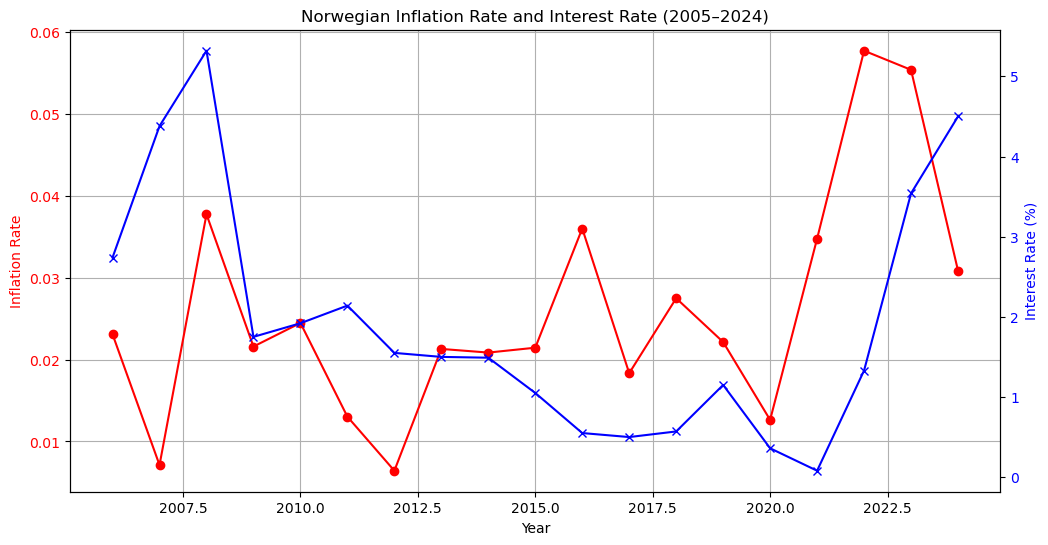

In [24]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(norway_data["Year"], norway_data["Inflation Rate"], color="red", marker="o", label="Inflation Rate")
ax1.set_xlabel("Year")
ax1.set_ylabel("Inflation Rate", color="red")
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()
ax2.plot(norway_data["Year"], norway_data["Interest Rate"], color="blue", marker="x", label="Interest Rate")
ax2.set_ylabel("Interest Rate (%)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

plt.title("Norwegian Inflation Rate and Interest Rate (2005–2024)")
ax1.grid(True)
plt.show()

I have done percentage change in CPI to get inflation rate.

In Figure we observe the evolution of Norway’s inflation rate and policy interest rate over the period 2005–2024. The inflation rate remained relatively stable until the aftermath of the COVID-19 pandemic, after which a sharp increase occurred. This surge in inflation corresponds to global supply chain disruptions and geopolitical tensions in Europe, which exerted upward pressure on consumer prices.

According to macroeconomic theory, particularly the framework of inflation targeting, central banks respond to persistent inflationary pressures by raising policy rates to curb aggregate demand and stabilize prices. This relationship is consistent with the observed data: Norges Bank maintained low policy rates from 2012 to 2020, contributing to a gradual rise in inflation. However, in response to the post-pandemic inflation spike, the central bank rapidly increased the policy rate from near-zero levels to over 4% by 2024.

This behavior aligns with the Phillips Curve theory, with IS curve dynamics, where an increase in real interest rates reduces output gaps, leading to lower inflation over time. The sharp tightening of monetary policy observed after 2021 reflects Norges Bank’s commitment to restoring price stability, demonstrating the practical application of inflation targeting principles in Norwegian monetary policy.

b)

https://fred.stlouisfed.org/series/CPIAUCSL

In [29]:
us_cpi = pd.read_csv("3_data/cpi_us.csv")
us_cpi = us_cpi.rename(columns={"observation_date": "Date", "CPIAUCSL": "CPI"})
us_cpi["Date"] = pd.to_datetime(us_cpi["Date"])
us_cpi["Year"] = us_cpi["Date"].dt.year
us_cpi = us_cpi.groupby("Year")["CPI"].mean().reset_index()
us_cpi["Inflation Rate"] = us_cpi["CPI"].pct_change()
us_cpi = us_cpi.dropna()
print(us_cpi)


    Year         CPI  Inflation Rate
1   2006  201.558333        0.032221
2   2007  207.344167        0.028706
3   2008  215.254250        0.038150
4   2009  214.564667       -0.003204
5   2010  218.076167        0.016366
6   2011  224.923000        0.031397
7   2012  229.586083        0.020732
8   2013  232.951750        0.014660
9   2014  236.715000        0.016155
10  2015  237.001750        0.001211
11  2016  240.005417        0.012674
12  2017  245.121000        0.021314
13  2018  251.099500        0.024390
14  2019  255.652583        0.018133
15  2020  258.855750        0.012529
16  2021  270.967917        0.046791
17  2022  292.625417        0.079926
18  2023  304.704167        0.041277
19  2024  313.697833        0.029516


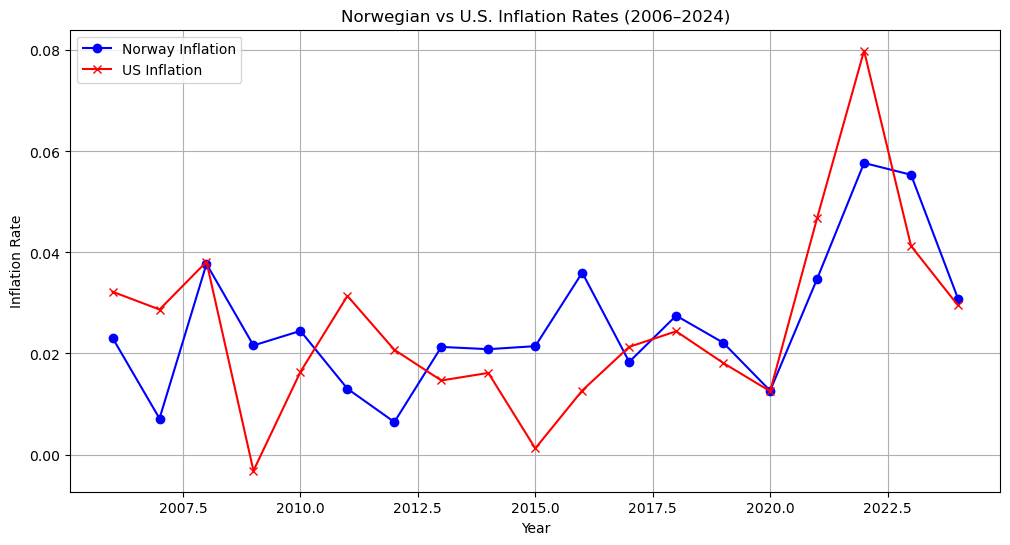

In [30]:
norway_inflation = norway_data[["Year", "Inflation Rate"]].rename(columns={"Inflation Rate": "Norway Inflation"})
combined = pd.merge(norway_inflation, us_cpi[["Year", "Inflation Rate"]].rename(columns={"Inflation Rate": "US Inflation"}), on="Year")
plt.figure(figsize=(12,6))
plt.plot(combined["Year"], combined["Norway Inflation"], label="Norway Inflation", marker='o', color="blue")
plt.plot(combined["Year"], combined["US Inflation"], label="US Inflation", marker='x', color="red")

plt.title("Norwegian vs U.S. Inflation Rates (2006–2024)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate")
plt.grid(True)
plt.legend()
plt.show()

In this figure, I plotted the annual inflation rates for Norway and the United States from 2006 to 2024. The Norwegian inflation data was sourced from Statistics Norway (SSB), while U.S. inflation data was sourced from the Federal Reserve Economic Data (FRED), based on the Consumer Price Index for All Urban Consumers (CPI-U).

For Norway, inflation rates were computed as the year-over-year percentage change in the Consumer Price Index (CPI). For the U.S., monthly CPI data was first aggregated into annual averages to match the Norwegian data's frequency. Then, U.S. inflation rates were similarly calculated as the year-over-year percentage change in the CPI.

The graph shows that Norwegian and U.S. inflation rates have generally followed similar patterns, particularly after the COVID-19 pandemic. Both countries experienced a sharp rise in inflation around 2021–2022, reflecting global supply chain disruptions, energy price increases, and geopolitical instability.

This observation supports the argument mentioned in the public debate: a significant portion of the inflationary pressure faced by Norway was imported from abroad, rather than being caused by domestic factors.

But, since in open economy macroeconomics, inflation is often modeled as a weighted average of domestic inflation and imported inflation even if Norges Bank raised the key policy rate aggressively to control inflation, its actions could only influence the domestic component. Imported inflation, driven by global price developments, would largely be beyond the central bank’s control.

c)

In [65]:
inflation_nor_m = pd.read_csv("3_data/cpi_Norway_monthly.csv", sep=";", skiprows=1)
inflation_nor_m = inflation_nor_m.drop(columns=["contents"])
inflation_nor_m = inflation_nor_m.melt(id_vars="month", var_name="Year", value_name="CPI")
inflation_nor_m = inflation_nor_m.rename(columns={"month": "Month"})
inflation_nor_m["Date"] = pd.to_datetime(inflation_nor_m["Year"].astype(str) + "-" + inflation_nor_m["Month"], format="%Y-%B")
inflation_nor_m = inflation_nor_m.sort_values("Date").reset_index(drop=True)
inflation_nor_m = inflation_nor_m.rename(columns={"CPI": "CPI_Norway"})
print(inflation_nor_m)

         Month  Year  CPI_Norway       Date
0      January  2005        81.2 2005-01-01
1     February  2005        81.3 2005-02-01
2        March  2005        81.7 2005-03-01
3        April  2005        82.1 2005-04-01
4          May  2005        82.4 2005-05-01
..         ...   ...         ...        ...
235     August  2024       133.3 2024-08-01
236  September  2024       133.7 2024-09-01
237    October  2024       134.5 2024-10-01
238   november  2024       134.9 2024-11-01
239   December  2024       134.8 2024-12-01

[240 rows x 4 columns]


In [66]:
us_cpi = pd.read_csv("3_data/cpi_us.csv")
us_cpi = us_cpi.rename(columns={"observation_date": "Date", "CPIAUCSL": "CPI_US"})
us_cpi["Date"] = pd.to_datetime(us_cpi["Date"])
us_cpi = us_cpi.sort_values("Date").reset_index(drop=True)
print(us_cpi)

          Date   CPI_US
0   2005-01-01  191.600
1   2005-02-01  192.400
2   2005-03-01  193.100
3   2005-04-01  193.700
4   2005-05-01  193.600
..         ...      ...
235 2024-08-01  314.131
236 2024-09-01  314.851
237 2024-10-01  315.564
238 2024-11-01  316.449
239 2024-12-01  317.603

[240 rows x 2 columns]


In [67]:
cpi_merged = pd.merge(inflation_nor_m[["Date", "CPI_Norway"]], us_cpi[["Date", "CPI_US"]], on="Date")
cpi_merged["Inflation_Norway"] = cpi_merged["CPI_Norway"].pct_change()
cpi_merged["Inflation_US"] = cpi_merged["CPI_US"].pct_change()
cpi_merged = cpi_merged.dropna()
print(cpi_merged)

          Date  CPI_Norway   CPI_US  Inflation_Norway  Inflation_US
1   2005-02-01        81.3  192.400          0.001232      0.004175
2   2005-03-01        81.7  193.100          0.004920      0.003638
3   2005-04-01        82.1  193.700          0.004896      0.003107
4   2005-05-01        82.4  193.600          0.003654     -0.000516
5   2005-06-01        82.4  193.700          0.000000      0.000517
..         ...         ...      ...               ...           ...
235 2024-08-01       133.3  314.131         -0.008922      0.001802
236 2024-09-01       133.7  314.851          0.003001      0.002292
237 2024-10-01       134.5  315.564          0.005984      0.002265
238 2024-11-01       134.9  316.449          0.002974      0.002805
239 2024-12-01       134.8  317.603         -0.000741      0.003647

[239 rows x 5 columns]


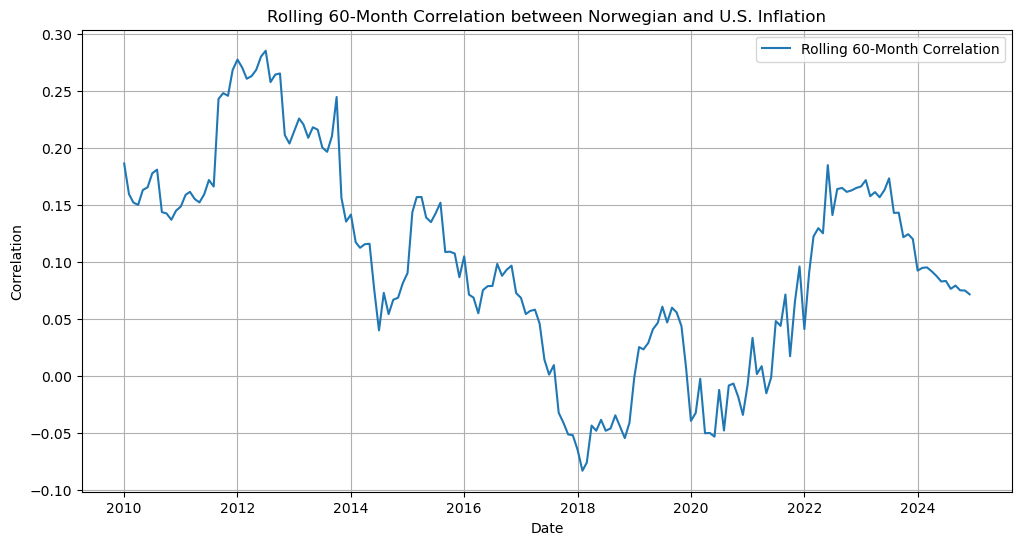

In [68]:
#window 60
cpi_merged["Rolling_Corr"] = cpi_merged["Inflation_Norway"].rolling(60).corr(cpi_merged["Inflation_US"])

plt.figure(figsize=(12,6))
plt.plot(cpi_merged["Date"], cpi_merged["Rolling_Corr"], label="Rolling 60-Month Correlation")
plt.title("Rolling 60-Month Correlation between Norwegian and U.S. Inflation")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.grid(True)
plt.legend()
plt.show()

In the figure, I plotted the time-varying rolling 60-month correlation between Norwegian and U.S. inflation from 2010 to 2024. The data sources were Statistics Norway (SSB) for the Norwegian CPI and the Federal Reserve Economic Data (FRED) for the U.S. CPI. Inflation rates were calculated as monthly percentage changes in the Consumer Price Index (CPI), inflation in Norway and the U.S. were compared within the same month.

The rolling correlation fluctuates over time, generally remaining positive but varying in strength. This suggests that while Norwegian and U.S. inflation rates are somewhat related, the relationship is not extremely strong or stable. The correlation tends to rise during periods of global economic disturbances, such as the COVID-19 pandemic and the energy price shocks in 2021–2022. These reflect how global supply chain disruptions and price shocks simultaneously affected both the U.S. and Norwegian economies.

This observation supports the argument made in the public debate: a significant portion of the inflationary pressure faced by Norway has been imported from abroad, rather than being driven by domestic demand. If inflationary pressures were purely domestic, I would expect a weaker or no strong correlation with U.S. inflation. However, the visible positive correlation during global turmoil underlines the role of imported inflation in Norway.

Thus, although Norges Bank’s interest rate increases were aimed at controlling domestic inflation, the graph suggests that part of the inflation dynamics stemmed from external factors beyond Norges Bank’s control. 

d)

https://app.norges-bank.no/query/#/en/interest?interesttype=KPRA&unitofmeasure=R&duration=SD&frequency=M&startdate=2005-01-01&stopdate=2025-04-26

In [75]:
ir_norway_monthly = pd.read_csv("3_data/IR_Norway_Monthly.csv", sep=";")
ir_norway_monthly = ir_norway_monthly[["TIME_PERIOD", "OBS_VALUE"]]
ir_norway_monthly = ir_norway_monthly.rename(columns={
    "TIME_PERIOD": "Date",
    "OBS_VALUE": "IR_Norway"
})
ir_norway_monthly["Date"] = pd.to_datetime(ir_norway_monthly["Date"], format="%Y-%m")
ir_norway_monthly = ir_norway_monthly.sort_values("Date").reset_index(drop=True)
print(ir_norway_monthly)

          Date  IR_Norway
0   2005-01-01       1.75
1   2005-02-01       1.75
2   2005-03-01       1.75
3   2005-04-01       1.75
4   2005-05-01       1.75
..         ...        ...
238 2024-11-01       4.50
239 2024-12-01       4.50
240 2025-01-01       4.50
241 2025-02-01       4.50
242 2025-03-01       4.50

[243 rows x 2 columns]


https://fred.stlouisfed.org/series/FEDFUNDS

In [77]:
ir_us_monthly = pd.read_csv("3_data/US_IR_Monthly.csv")
ir_us_monthly = ir_us_monthly.rename(columns={
    "observation_date": "Date",
    "FEDFUNDS": "IR_US"
})
ir_us_monthly["Date"] = pd.to_datetime(ir_us_monthly["Date"])
ir_us_monthly = ir_us_monthly.sort_values("Date").reset_index(drop=True)
print(ir_us_monthly)

          Date  IR_US
0   2005-01-01   2.28
1   2005-02-01   2.50
2   2005-03-01   2.63
3   2005-04-01   2.79
4   2005-05-01   3.00
..         ...    ...
238 2024-11-01   4.64
239 2024-12-01   4.48
240 2025-01-01   4.33
241 2025-02-01   4.33
242 2025-03-01   4.33

[243 rows x 2 columns]


In [78]:
ir_data = pd.merge(ir_norway_monthly, ir_us_monthly, on="Date", how="inner")
print(ir_data)


          Date  IR_Norway  IR_US
0   2005-01-01       1.75   2.28
1   2005-02-01       1.75   2.50
2   2005-03-01       1.75   2.63
3   2005-04-01       1.75   2.79
4   2005-05-01       1.75   3.00
..         ...        ...    ...
238 2024-11-01       4.50   4.64
239 2024-12-01       4.50   4.48
240 2025-01-01       4.50   4.33
241 2025-02-01       4.50   4.33
242 2025-03-01       4.50   4.33

[243 rows x 3 columns]


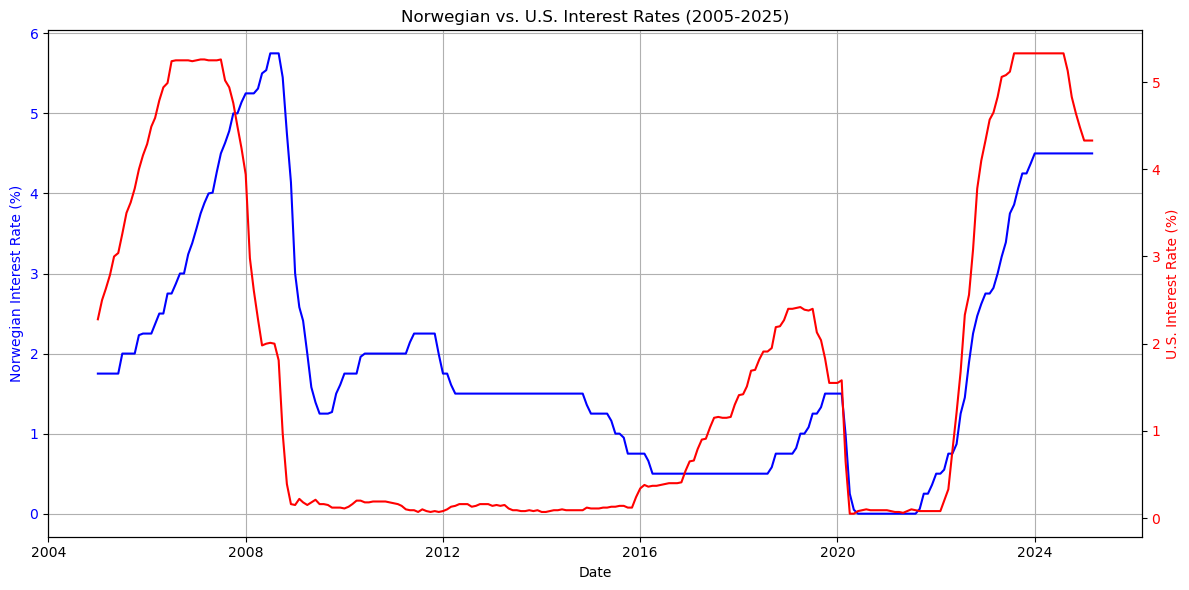

In [80]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(ir_data["Date"], ir_data["IR_Norway"], color="blue", label="Norwegian IR")
ax1.set_ylabel("Norwegian Interest Rate (%)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_xlabel("Date")

ax2 = ax1.twinx()
ax2.plot(ir_data["Date"], ir_data["IR_US"], color="red", label="U.S. IR")
ax2.set_ylabel("U.S. Interest Rate (%)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("Norwegian vs. U.S. Interest Rates (2005-2025)")
ax1.grid(True)
fig.tight_layout()
plt.show()

In this figure, I plot the monthly Norwegian and U.S. interest rates from 2005 to 2025. The Norwegian data is sourced from Norges Bank (key policy rate) and the U.S. data from the Federal Reserve Economic Data (FRED, Effective Federal Funds Rate). The only data transformation performed was adjusting the format to a common monthly frequency to enable direct comparison.

The graph shows that while both countries generally follow global economic cycles: during the Global Financial Crisis (2008–2009) and COVID-19 pandemic (2020), both Norges Bank and the Federal Reserve sharply reduced interest rates. However, the Norwegian interest rate remained above the U.S. rate for much of the post-2009 period, reflecting different domestic economic conditions and inflation dynamics. After 2021, both countries rapidly raised rates to combat rising inflation.

This visual supports the idea that although global factors influence both countries, Norges Bank also responds independently to domestic economic developments.

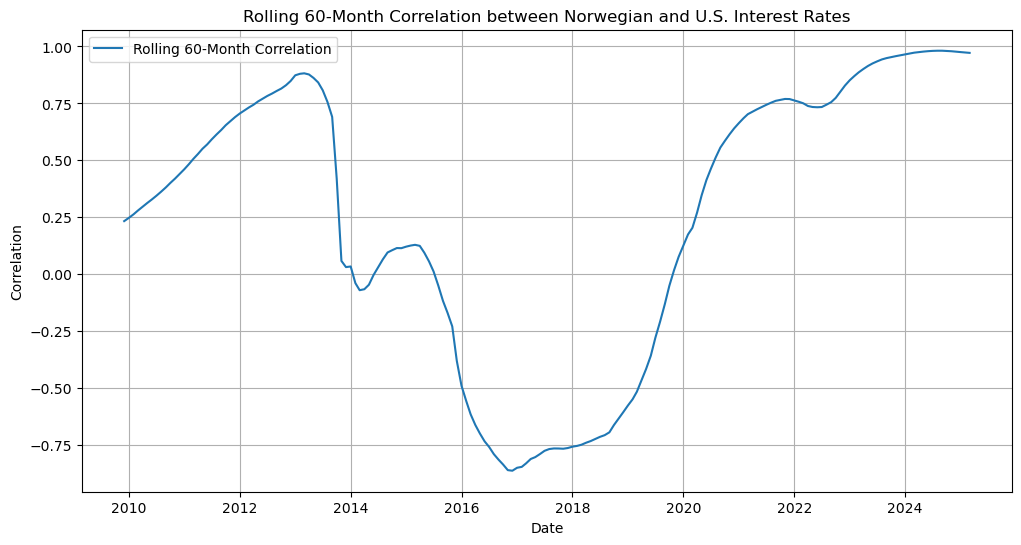

In [82]:
ir_data["Rolling_Corr"] = ir_data["IR_Norway"].rolling(60).corr(ir_data["IR_US"])

plt.figure(figsize=(12,6))
plt.plot(ir_data["Date"], ir_data["Rolling_Corr"], label="Rolling 60-Month Correlation")
plt.title("Rolling 60-Month Correlation between Norwegian and U.S. Interest Rates")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.grid(True)
plt.legend()
plt.show()

In this figure, I present the 60-month rolling contemporaneous correlation between Norwegian and U.S. interest rates.

The graph reveals that the correlation between the two countries’ interest rates varies substantially over time. It peaked around 2012–2014 and again after 2020, meaning higher correlation during periods of major global shocks (post-financial crisis, COVID-19 pandemic). In contrast, the correlation weakened significantly between 2015 and 2019, a period of relatively stable global conditions, reflecting more independent monetary policy actions by Norges Bank.

In light of the public debate about imported inflation, this finding suggests that while global events (and U.S. monetary policy) clearly influence Norwegian interest rates during crises, Norges Bank still exercises significant autonomy in normal times. This supports the view that while imported factors matter, Norwegian monetary policy remains tailored to national conditions when external pressures are weaker.

e)

https://fred.stlouisfed.org/series/DEXNOUS

1USD = XNOK

In [86]:
ex_rate = pd.read_csv("3_data/NOK_to_US.csv")
#making in monthly
ex_rate = ex_rate.rename(columns={"observation_date": "Date", "DEXNOUS": "USDNOK"})
ex_rate["Date"] = pd.to_datetime(ex_rate["Date"])
ex_rate = ex_rate.dropna()
ex_rate_monthly = ex_rate.set_index("Date").resample("M").mean().reset_index()
print(ex_rate_monthly)

          Date     USDNOK
0   2005-01-31   6.267175
1   2005-02-28   6.396000
2   2005-03-31   6.211578
3   2005-04-30   6.314743
4   2005-05-31   6.365605
..         ...        ...
235 2024-08-31  10.689973
236 2024-09-30  10.622560
237 2024-10-31  10.836636
238 2024-11-30  11.053726
239 2024-12-31  11.220433

[240 rows x 2 columns]


C:\Users\ikorn\AppData\Local\Temp\ipykernel_25396\3233242509.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ex_rate_monthly = ex_rate.set_index("Date").resample("M").mean().reset_index()


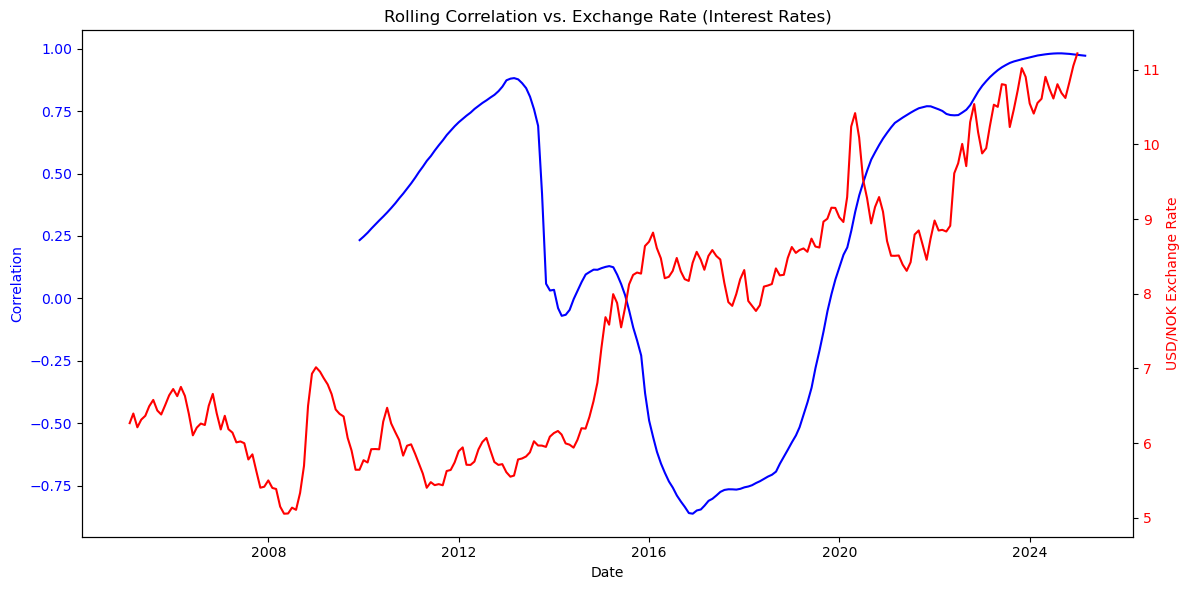

In [87]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(ir_data["Date"], ir_data["Rolling_Corr"], color="blue", label="Rolling 60M Correlation (IR)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Correlation", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(ex_rate_monthly["Date"], ex_rate_monthly["USDNOK"], color="red", label="USD/NOK Exchange Rate")
ax2.set_ylabel("USD/NOK Exchange Rate", color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("Rolling Correlation vs. Exchange Rate (Interest Rates)")
fig.tight_layout()
plt.show()

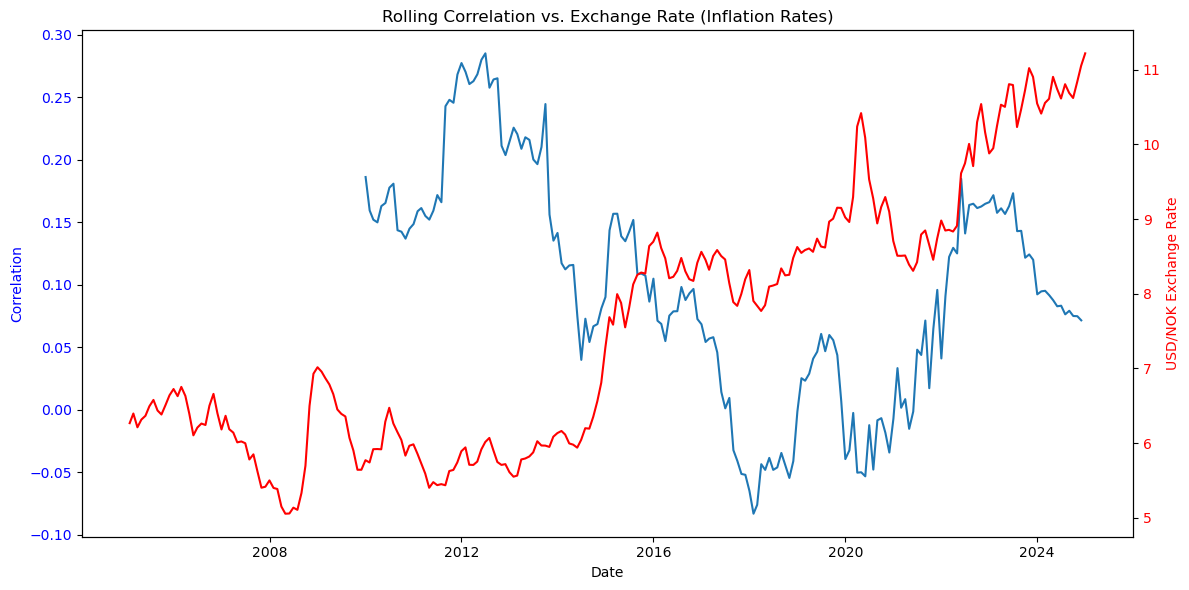

In [89]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(cpi_merged["Date"], cpi_merged["Rolling_Corr"], label="Rolling 60-Month Correlation")
ax1.set_xlabel("Date")
ax1.set_ylabel("Correlation", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(ex_rate_monthly["Date"], ex_rate_monthly["USDNOK"], color="red", label="USD/NOK Exchange Rate")
ax2.set_ylabel("USD/NOK Exchange Rate", color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("Rolling Correlation vs. Exchange Rate (Inflation Rates)")
fig.tight_layout()
plt.show()

According to https://www.norges-bank.no/contentassets/7515b088debf4c1aa18ff18c3a95ca4e/occasionalpapers_53.pdf?v=19122018134036

In analyzing the relationship between the USD/NOK exchange rate and the correlation patterns between Norwegian and U.S. inflation and interest rates, two key transmission mechanisms are important. First, the Exchange Rate Channel to Aggregate Demand suggests that when the NOK depreciates (the USD/NOK rises), Norwegian goods become relatively cheaper compared to foreign goods. This boosts exports and domestic demand, which subsequently puts upward pressure on domestic inflation. According to the IS curve for an open economy (equation 28 in RS), changes in the exchange rate thus impact real economic activity, reinforcing the connection between monetary policy settings across countries. Second, the Direct Exchange Rate Channel to Inflation (Imported Inflation) highlights that a weaker NOK directly increases the prices of imported goods, raising consumer price inflation even without any change in domestic demand conditions. As shown in RS (equation 30), imported inflation responds directly to the real exchange rate, meaning exchange rate fluctuations can cause immediate inflationary effects by raising import costs.

The two graphs illustrate these mechanisms well. In the first graph, plotting the rolling correlation between Norwegian and U.S. interest rates alongside the USD/NOK exchange rate, we observe that periods of NOK depreciation (rising USD/NOK) often coincide with higher correlations between the two countries’ interest rates. This suggests that Norges Bank’s policy decisions become more synchronized with the Federal Reserve when facing external inflationary pressures. In the second graph, which plots the rolling correlation between Norwegian and U.S. inflation rates together with the exchange rate, a similar pattern emerges: during periods of NOK depreciation, the correlation between domestic and foreign inflation tends to increase. This supports the view that exchange rate movements enhance the link between external inflationary forces and domestic price developments, working through both aggregate demand and direct imported inflation channels.

f)

writen